# Hawaiian endemic species classifier

For the endemic species, we can try a model to recognise between five species of:

- Black Mamo,

- **Hawaiian goose**

- Happy Face Spider

- **Apapane**

- **Hawaiian Coot**

- **Amakihi**

- **Elepaio**

- Hawaiian hoary bat

- Hawaiian monk seal

- Silverswords

Choosing the five species required us to evaluate whether it is possible to find enough images on the internet. The species bolded are those that we have sufficient resources for.

###General Setup

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset generation

We have collected our own images for this task, below is the code that we have used to find our images.

In [ ]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (

In [ ]:
from fastbook import *
import requests
from requests.exceptions import Timeout

In [ ]:
queries_and_folder_name = [
    ["Hawaiian goose", "hawaiian_goose"],
    ["Hawaiian goose bird", "hawaiian_goose"],
    ["Hawaiian goose bird", "hawaiian_goose"],
    ["Apapane", "apapane"],
    ["Apapane bird", "apapane"],
    ["Apapane drawing", "apapane"],
    ["Hawaiian Coot", "hawaiian_coot"],
    ["Hawaiian Coot bird", "hawaiian_coot"],
    ["Hawaiian Coot drawing", "hawaiian_coot"],
    ["Amakihi", "amakihi"],
    ["Amakihi bird", "amakihi"],
    ["Amakihi drawing", "amakihi"],
    ["Elepaio", "elepaio"],
    ["Elepaio bird", "elepaio"],
    ["Elepaio drawing", "elepaio"]
    #More queries for more images:

]

for element in queries_and_folder_name:
  folder_path = f'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/{element[1]}'
  print(f"We are searching for {element[0]}")
  try:
    file_counter = len(os.listdir(folder_path))
  except:
    print("Creating a new folder")
    os.makedirs(folder_path, exist_ok=True)

  urls = search_images_ddg(element[0], max_images=300)
  for i in range(len(urls)):
    try:
      response = requests.get(urls[i], timeout=2)
      try:
        download_url(urls[i], f'{folder_path}/image_{file_counter}.jpg')
        file_counter += 1
      except:
        print("Download failed")
    except Timeout:
      print("The request timed out")
    except Exception as e:
        print(f"An unexpected error occurred")
    except requests.exceptions.RequestException as e:
        print(f"Download failed with requestException")

im = Image.open(f'/content/drive/MyDrive/comp4211/Project/plushies_dataset_images/cute_plushie_1.jpg')
im.thumbnail((256,256))
im


# Observations and discussion

This is a **classification task** similar to Programming Assignment 2.


**One difference** however is that we do not have tsv files for our datasets, but that shouls be okay considering that we are not considering the style of the image.


**Another difference** is that the images are now separated into different folders based on what animals they are for, therefore, instead of using a tsv file to label them, as in Assignment 2, we can instead label them by creating multiple Classification datasets with different path

**Another difference** is that our training images are not separated from our testing images, as compared to Assignment 2.

# Setting up for the next part

## Some issues may occur:
- The image may appear as a duplicate
- The image might not be a picture, and instead might be a drawing or a cartoon
- The image obtained contains other elements
components
- The image does not contain the animal at all.

The first issue will be handled by detecting duplicates in a folder and deleting the duplicates.

The second issue might actually work in our favour, since this would make the model more robust and able to potentially recognise a wider range of style.

We will not address the third issue in this project since it would require to much workload, however it is mentionned in the "Further works" section, and the solution is proposed!

We address the fourth issue in the Self filtering section of that report! This section is actually optional, however we wanted to see if it was possible to use the trained model to filter the images, and then re-train the model to get a better accuracy!

## Constants

In [82]:
DATASETS_PATHS_AND_NAMES = [
    {"path": '/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose', "name": 'Hawaiian Goose', "folder_name": "hawaiian_goose"},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/apapane', "name": 'Apapane', "folder_name": "apapane"},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_coot', "name": 'Hawaiian coot', "folder_name": "hawaiian_coot"},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/amakihi', "name": 'Amakihi', "folder_name": "amakihi"},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/elepaio', "name": 'Elepaio', "folder_name": "elepaio"}
]

DATASET_PATH = '/content/drive/MyDrive/comp4211/Project/endemic_images_folder'

## Removing duplicates

In [2]:
##Imports
!pip install imagehash
import imagehash
import os
from PIL import Image

In [ ]:
def remove_duplicate_images(directory):
    hash_dict = {}
    duplicate_paths = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath) and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            with open(filepath, 'rb') as f:
              try:
                img_hash = imagehash.average_hash(Image.open(f))
              except:
                print("Can't open the file ", f)
            if img_hash in hash_dict:
                duplicate_paths.append(filepath)
            else:
                hash_dict[img_hash] = filepath

    # Remove duplicate images
    for duplicate_path in duplicate_paths:
        print("Duplicate found")
        try:
          os.remove(duplicate_path)
        except:
          print("Can't remove the file ", duplicate_path)

    print(f"{len(duplicate_paths)} duplicate images removed.")

In [ ]:
for dataset_path_and_name in DATASETS_PATHS_AND_NAMES:
  remove_duplicate_images(directory = dataset_path_and_name["path"])

Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_2.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_10.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_252.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_305.jpg'>


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_487.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_569.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_604.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_781.jpg'>
Can't open the file  <_io.BufferedReader name='/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_862.jpg'>
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate found
Duplicate fo

## Imports

In [287]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
# import tensorflow==2.15.0 as tf

# Important submodules and functions from Tensorflow (and Keras)
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, Reshape, MaxPooling2D, Lambda, Layer, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

# Image handling and visualization
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython.display import display
from tqdm.notebook import tqdm
import cv2

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Other utility
import datetime
import psutil

# Module settings:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # This will hide all TensorFlow messages, except for errors.
tf.get_logger().setLevel('ERROR')  # This sets TensorFlow logger to only output error messages.

## Utilities functions

In [4]:
# Prepares an image for the model by converting RGB to BGR and subtracting the mean pixel values.
def preprocess(x):
    img = tf.reverse(x, axis=[-1])  # RGB to BGR
    img -= np.array([103.939, 116.779, 123.68])  # Subtract mean pixel value
    return img

# Converts the output of the model back to a viewable image by adding mean pixel values and converting BGR to RGB.
def deprocess(x):
    img = x + np.array([103.939, 116.779, 123.68])  # Add mean pixel value
    img = tf.reverse(img, axis=[-1])  # BGR to RGB
    img = tf.clip_by_value(img, 0.0, 255.0)  # Ensure pixel value range is valid
    return img

# Loads an image from disk, optionally resizes it, and prepares it for the model.
def get_image(img_path, resize=True, shape=(256,256)):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB
    if resize:
        image = cv2.resize(image, shape)  # Resize image
    image = image.astype(np.float32)  # Convert to float32 for model compatibility
    return image

# Finds and returns a list of images (files) within a directory path that matches a certain file type.
def find_images(dir_path, file_type):
    image_paths = []

    for root, _, files in os.walk(dir_path):
        for file in files:
            if f'.{file_type}' in file:
                image_paths.append(os.path.join(root, file))

    return image_paths


## Defining the Classification Dataset class

This class, similarly to Assignment 2, also has a add_data function, however it is used by giving an array containing dictionnary(ies) in the form:
{path: x, label: x}

### Handling splitting into train and test ds

In order to deal with splitting the train ds and the test ds, we now let the task of initializing the panda dataframe to another function and therefore we pass the panda dataframe directly to the classification dataset constructor.

This dataframe has the path and the label of the images

### Defining the ClassificationDataset class

In [138]:
Label_To_Int = {
    "Hawaiian Goose": 0,
    "Apapane": 1,
    "Hawaiian coot": 2,
    "Amakihi": 3,
    "Elepaio": 4
}

In [161]:
class ClassificationDataset:
    def __init__(self, dataset_panda_frame, batch_size=8, random_state = 4211):
        self.batch_size = batch_size
        self.random_state = random_state


        ###Create panda dataframe that contains two columns, the first is the animal name, the second is the path.
        self.data_table = dataset_panda_frame #TODO
        self.total_samples = len(self.data_table)
        self.unique_labels = self.data_table['label'].unique()


        ## For handling shuffling
        self.indices = np.arange(self.total_samples)


        self.ds_pointer = 0

    def getImagePathByIndex(self, index):
      row = self.data_table.iloc[index]
      return row["image_path"]


    def getClassStringBasedOnOneHotIndex(self, index): #eg if pass in 4, map to [0,0,0,0,1], map to "dog"
      return self.unique_labels[index]

    def getNumLabels(self):
      return (len(self.unique_labels))

    def reset_pointer(self, seed=None):
        self.ds_pointer = 0
        np.random.seed(seed)
        np.random.shuffle(self.indices)


    def get_batch(self):
        if self.ds_pointer + self.batch_size >= self.total_samples:
            self.reset_pointer()

        batch_images = []


        for i in range(self.batch_size):
            index = self.indices[self.ds_pointer]
            row = self.data_table.iloc[index]
            image_label = row['label']
            #image_label = tf.cast(image_label, tf.int32)
            image_path = row['image_path']

            #BEfore
            class_to_index = {class_label: index for index, class_label in enumerate(self.unique_labels)}
            image_label = class_to_index[image_label]
            #image_label =Label_To_Int[image_label]

            image = get_image(image_path)
            pre_processed_image = preprocess(image)

            batch_images.append((pre_processed_image,tf.one_hot(image_label, len(self.unique_labels))))
            self.ds_pointer += 1

        return batch_images

    def returnTsvPd(self):
      return self.data_table

    def getUniqueTypes(self):
      return self.unique_labels

    def getNumSamples(self):
      return self.total_samples

    def getAllImagesPaths(self):
      return self.data_table["image_path"].values()

    def __len__(self):
        return  int(np.ceil(self.total_samples/self.batch_size))

# Analyzing and initializing the dataset variable

## Handling splitting into train ds and test ds

In [162]:
# Helper function: Takes in multiple paths, and create a panda dataframe
def createPandaFrameFromImagePaths(directories_paths_and_names):
    #TODO Create a panda dataframe
    newTable = pd.DataFrame()
    newTable['label'] = None
    newTable['image_path'] = None

    #Go through directories_paths_and_names
    for directory_path_and_name in directories_paths_and_names:
      directory_path = directory_path_and_name["path"]
      label = directory_path_and_name["name"] #This is the label name
      #TODO: Go through all files in the directory
      for file_name in os.listdir(directory_path):
        if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Assuming image files have these extensions
            image_path = os.path.join(directory_path, file_name)
            img = cv2.imread(image_path)
            if(img is not None):
              value = {
                  'label': label,
                  'image_path': image_path
              }
              # Append to the dataframe the label name and the image path
              newTable = pd.concat([newTable, pd.DataFrame([value])],  ignore_index=True)


    return newTable

In [141]:
##Create a dataframe with all the image path and image labels
current_dataframe = createPandaFrameFromImagePaths(directories_paths_and_names = DATASETS_PATHS_AND_NAMES)

In [142]:
### Split the panda dataframe into train_pd and test_pd
random_state = 4211
train_df, test_df = train_test_split(current_dataframe, test_size=0.2, random_state=random_state)

## Initializing Dataset

Now we can define two dataset, one for train and one for test

In [143]:
def prepare_datasets(training_df, testing_df):
    #####
    # Our settings here
    #####
    BATCH_SIZE = 64
    train_dataset = ClassificationDataset(dataset_panda_frame = training_df,batch_size = BATCH_SIZE)
    test_dataset = ClassificationDataset(dataset_panda_frame = testing_df,batch_size = BATCH_SIZE)
    return train_dataset,test_dataset


In [144]:
train_dataset, test_dataset = prepare_datasets(training_df = train_df, testing_df = test_df)

## Analyzing dataset

In [8]:
def tally_samples(dataset):
    tally = {}
    data_table = dataset.returnTsvPd()
    for _, row in data_table.iterrows():
        path = row['image_path']
        label = row['label']
        if label not in tally:
            tally[label] = 0
        tally[label] += 1
    print("Tally of samples for each label:")
    for label, count in tally.items():
        print(label, ": ", count)
    return tally

In [ ]:
temp = tally_samples(train_dataset)

Tally of samples for each label:
Elepaio :  326
Hawaiian Goose :  369
Hawaiian coot :  439
Amakihi :  367
Apapane :  363


In [ ]:
temp = tally_samples(test_dataset)

Tally of samples for each label:
Apapane :  89
Elepaio :  89
Hawaiian coot :  95
Amakihi :  107
Hawaiian Goose :  86


# Training

With the pre processing steps being done, we move on to the training phase

In [145]:
def build_vgg19_classifier(input_shape, num_class):
    # Create vgg19 structure
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

    # Additional layers
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024, activation='relu', name='dense1'))
    model.add(Dense(1024, activation='relu',  name='dense2'))
    model.add(Dense(512, activation='relu', name='dense3'))
    model.add(Dense(num_class, activation='softmax',  name='dense4'))

    #For Q11
    print("Report for vgg 19 classifier")
    model.summary()

    return model

In [146]:
def model_setup(current_dataset, LOAD_PATH = None):
    INPUT_SHAPE = (None, None, 3)
    NUM_CLASS = current_dataset.getNumLabels()

    ##############################################################

    # Build model
    model = build_vgg19_classifier(INPUT_SHAPE, NUM_CLASS)  # encoder
    loss_fn = tf.keras.losses.CategoricalCrossentropy()

    if LOAD_PATH:
        model.load_weights(LOAD_PATH)

    return model, loss_fn

In [147]:
model, loss = model_setup(train_dataset)

Report for vgg 19 classifier
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_198 (Conv2D)         (None, None, None, 64)    1792      
                                                                 
 conv2d_199 (Conv2D)         (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_66 (MaxPooli  (None, None, None, 64)    0         
 ng2D)                                                           
                                                                 
 conv2d_200 (Conv2D)         (None, None, None, 128)   73856     
                                                                 
 conv2d_201 (Conv2D)         (None, None, None, 128)   147584    
                                                                 
 max_pooling2d_67 (MaxPooli  (None, None, None, 128)   0         
 ng2D)                  

In [ ]:
#Summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 64)    1792      
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 64)    36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, None, None, 64)    0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 128)   73856     
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 128)   147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, None, None, 128)   0         
 g2D)                                                   

In [148]:
def model_train(model, dataset, loss_fn, n_epochs = 100, save_interval = 10, save_path=None, load_path=None):
    # Initialize the Optimizer
    #learning_rate=1e-4, weight_decay=5e-5
    optimizer = tf.keras.optimizers.Adam()

    # Calculate the number of batches per epoch
    n_batches = len(dataset)

    # Initialize other things
    process = psutil.Process(os.getpid())

    # Load weights if provided
    if load_path:
        model.load_weights(load_path)

    # Run for n epochs
    for e in range(1, n_epochs+1):
        pbar = tqdm(total=n_batches)
        # Reset Dataset Iterators
        dataset.reset_pointer()

        # Define Loss Metrics. To be updated in each batch
        losses = {"cross-entropy": 0.0}

        # Run for all batches
        for i in range(n_batches):

            # Fetch Training Batches
            batch_images = dataset.get_batch()
            images, labels = zip(*batch_images)
            images = np.array(images)
            labels = np.array(labels)

            # Execute Batch Training
            with tf.GradientTape() as tape:
                logits = model(images, training=True)
                loss = loss_fn(labels, logits)

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            # Update Loss Metrics
            losses["cross-entropy"] += loss.numpy()

            # Visualize loss during training
            string = "".join([f"{key} loss: {value:.3f}\t" for key, value in losses.items()])
            pbar.set_description(f"Epoch {e}/{n_epochs}\t" + string)
            pbar.update(1)

        # In case the session ends before the training is done, perform save the model from time to time:
        if e % save_interval == 0:
            if save_path:
                model.save(save_path)


In [149]:
MODEL_SAVE_PATH = '/content/drive/MyDrive/comp4211/Project/Model/classify.h5'

In [ ]:
model_train(model, train_dataset, loss, n_epochs = 100, save_interval = 10, save_path=MODEL_SAVE_PATH)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
#In case in crash, can continue here:
NumberEpochMore = 90
model_train(model, train_dataset, loss, n_epochs = NumberEpochMore, save_interval = 10, save_path=MODEL_SAVE_PATH,load_path=MODEL_SAVE_PATH)

# First evaluation of the results

In [193]:
def evaluate(model, dataset):
     # Calculate and accumulate the accuracy of the model across all batches in the given dataset.
    total_samples = 0
    correct_predictions = 0
    incorrect_printing_counter = 0
    dataset.reset_pointer()

    # Calculate the confusion matrix of the model on the given dataset.
    num_classes = dataset.getNumLabels()
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)

    n_batches = len(dataset)
    r_counter = 0

    for i in range(n_batches):
        batch_images = dataset.get_batch()
        images, labels = zip(*batch_images)
        images = np.array(images)
        labels = np.array(labels)


        # Predict labels using the model
        logits = model.predict(images)
        # predictions = tf.argmax(logits, axis=-1)
        predictions = tf.argmax(logits, axis=-1, output_type=tf.int32)

        # Update accuracy
        total_samples += labels.shape[0]


        # Run through the batch, Update confusion matrix
        for j in range(labels.shape[0]):

            true_label = np.argmax(labels[j])#.numpy()
            predicted_label = predictions[j].numpy()
            # print(f"Predicted label is {predicted_label}")
            # print(f"True label is {true_label}")
            # true_labels_string = dataset.getClassStringBasedOnOneHotIndex(true_label)
            # predicted_labels_string = dataset.getClassStringBasedOnOneHotIndex(predicted_label)
            if true_label == (predicted_label):   ###CHANGE HERE TODO TODO TODO
              correct_predictions += 1
            else:
              confusion_matrix[true_label, predicted_label] += 1


            ##Printing three incorrect guess
            if incorrect_printing_counter < 3 and true_label != predicted_label:
              current_image = images[j]
              de_pre_processed_image = deprocess(current_image)
              img = array_to_img(de_pre_processed_image)
              display(img)
              predicted_label_string = dataset.getClassStringBasedOnOneHotIndex(predicted_label)
              true_label_string = dataset.getClassStringBasedOnOneHotIndex(true_label)
              print(f"Oops!, The predicted was: {predicted_label_string}, but the true was: {true_label_string}")
              incorrect_printing_counter += 1

    accuracy = correct_predictions / total_samples

    return accuracy, confusion_matrix


Report for vgg 19 classifier
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_207 (Conv2D)         (None, None, None, 64)    1792      
                                                                 
 conv2d_208 (Conv2D)         (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, None, None, 64)    0         
 ng2D)                                                           
                                                                 
 conv2d_209 (Conv2D)         (None, None, None, 128)   73856     
                                                                 
 conv2d_210 (Conv2D)         (None, None, None, 128)   147584    
                                                                 
 max_pooling2d_70 (MaxPooli  (None, None, None, 128)   0         
 ng2D)                  

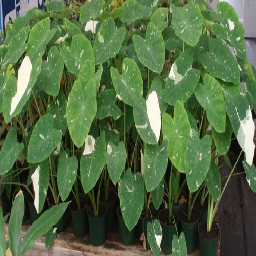

Oops!, The predicted was: Apapane, but the true was: Hawaiian Goose


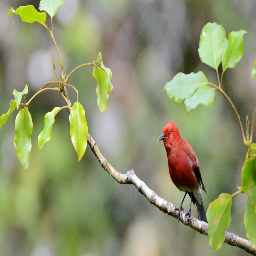

Oops!, The predicted was: Hawaiian Goose, but the true was: Elepaio


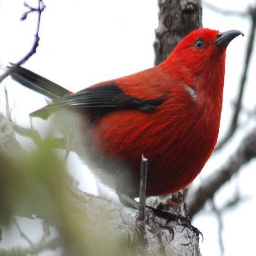

Oops!, The predicted was: Hawaiian Goose, but the true was: Elepaio
2/2 [==============================] - 0s 25ms/step


In [151]:
#TESTING AGAINST TEST DS
model, loss = model_setup(current_dataset = train_dataset, LOAD_PATH= MODEL_SAVE_PATH)
accuracy, confusion_matrix_data = evaluate(model, test_dataset)

Accuracy: 0.349609375
Confusion Matrix:


([<matplotlib.axis.YTick at 0x7ce7c4733a00>,
 [Text(0, 0, 'Apapane'),
  Text(0, 1, 'Elepaio'),
  Text(0, 2, 'Hawaiian coot'),
  Text(0, 3, 'Amakihi'),
  Text(0, 4, 'Hawaiian Goose')])

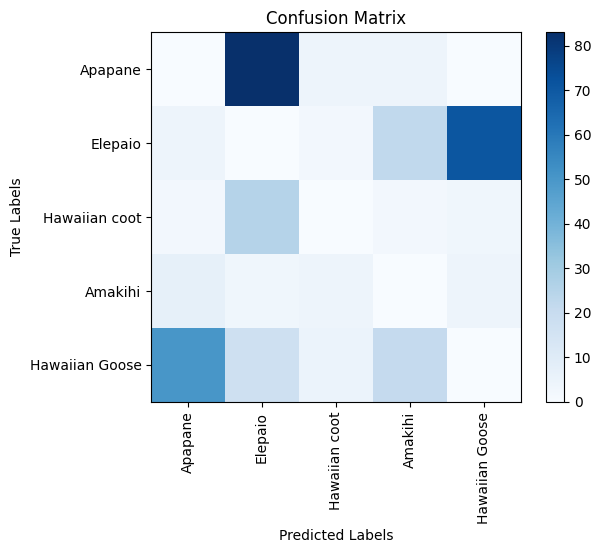

In [152]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
unique_types = test_dataset.getUniqueTypes()
num_classes = test_dataset.getNumLabels()
tick_locations = range(len(unique_types))

plt.imshow(confusion_matrix_data, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(tick_locations, unique_types, rotation='vertical')
plt.yticks(tick_locations, unique_types)


# Enhancements Attempt 1: Removing Background using pre trained deeplab model

In this section, we will try to rise the current accuracy of 33% by removing the background of the images.

We will achieve that by using the pre trained deeplab model in order to perform segmentation and keep only the foreground, built on top of the TensorFlow.

In [13]:
import cv2
import torch
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt
import os
import numpy as np

In [14]:
def load_model():
  model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
  model.eval()
  return model

In [15]:
def make_transparent_foreground(pic, mask):
  # split the image into channels
  b, g, r = cv2.split(np.array(pic).astype('uint8'))
  # add an alpha channel with and fill all with transparent pixels (max 255)
  a = np.ones(mask.shape, dtype='uint8') * 255
  # merge the alpha channel back
  alpha_im = cv2.merge([b, g, r, a], 4) #a
  # create a transparent background
  bg = np.zeros(alpha_im.shape)
  # setup the new mask
  new_mask = np.stack([mask, mask, mask, mask], axis=2)
  # copy only the foreground color pixels from the original image where mask is set
  foreground = np.where(new_mask, alpha_im, bg).astype(np.uint8)

  return foreground

def remove_background(model, input_file, output_file,the_index):
  input_image = Image.open(input_file)
  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)['out'][0]
  output_predictions = output.argmax(0)

  # create a binary (black and white) mask of the profile foreground
  mask = output_predictions.byte().cpu().numpy()
  background = np.zeros(mask.shape)
  bin_mask = np.where(mask, 255, background).astype(np.uint8)

  foreground = make_transparent_foreground(input_image ,bin_mask)

  output_dir = os.path.dirname(output_file)
  os.makedirs(output_dir, exist_ok=True)
  print(f"The output file is {output_file}")
  plt.imshow(foreground)
  plt.axis('off')  # Turn off the axis, which removes ticks and labels
  plt.gca().xaxis.set_major_locator(plt.NullLocator())  # No x-axis ticks
  plt.gca().yaxis.set_major_locator(plt.NullLocator())  # No y-axis ticks
  plt.savefig(output_file, bbox_inches='tight', pad_inches=0, transparent=True)  # Save the figure
  plt.close()  # Close the plotting window to free up resources
  # foreground_pil = Image.fromarray(foreground[..., [2, 1, 0, 3]])  # reorder to RGB and keep alpha
  # foreground_pil.save(output_file, 'PNG')


  # cv2.imwrite(output_file, foreground)

  #Image.fromarray(foreground).save(output_file)



  return foreground, bin_mask

Now going through all files and applying the function

In [19]:
DATASETS_PATHS_AND_NAMES = [
    # {"path": '/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose', "name": 'Hawaiian Goose', "folder_name": "hawaiian_goose"},
    # {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/apapane', "name": 'Apapane', "folder_name": "apapane"},
    # {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_coot', "name": 'Hawaiian coot', "folder_name": "hawaiian_coot"},
    # {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/amakihi', "name": 'Amakihi', "folder_name": "amakihi"},
    # {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images_folder/elepaio', "name": 'Elepaio', "folder_name": "elepaio"}
]

In [17]:
NEW_FOLDER_BACKGROUND_REMOVED_PATH = '/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder'

In [ ]:
#Deeplab tutorial from https://colab.research.google.com/github/eugenesiow/practical-ml/blob/master/notebooks/Remove_Image_Background_DeepLabV3.ipynb#scrollTo=9K9nBWYXoQZv

In [18]:
deeplab_model = load_model()

for dataset_path_and_name  in DATASETS_PATHS_AND_NAMES:
  counter = 0
  folder_name = dataset_path_and_name["folder_name"]
  output_folder_name = os.path.join(NEW_FOLDER_BACKGROUND_REMOVED_PATH, folder_name)
  directory = dataset_path_and_name["path"]
  for filename in os.listdir(directory):
      if filename.endswith(".jpg") or filename.endswith(".png"):
          image_path = os.path.join(directory, filename)
          output_path = os.path.join(output_folder_name, filename)
          try:
            foreground, bin_mask = remove_background(deeplab_model, image_path, output_path, counter)
            counter = 1 + counter
          except:
            print(f"Error for {image_path}")


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_0.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_1.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_3.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_4.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_5.jpg
Error for /content/drive/MyDrive/comp4211/Project/endemic_images_folder/hawaiian_goose/image_5.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_6.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/image_7.jpg
The output file is /content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose/i

## Re-training using enhanced Dataset

Now that the images background are removed, we will define a new Dataset, split it and perform the training again.

In [263]:
from itertools import permutations

NO_BG_DATASETS_PATHS_AND_NAMES = [
    {"path":'/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/elepaio', "name": 'Elepaio', "folder_name": "elepaio"},
    {"path":'/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/amakihi', "name": 'Amakihi', "folder_name": "amakihi"},
    {"path":'/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/apapane', "name": 'Apapane', "folder_name": "apapane"},
    {"path": '/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_goose', "name": 'Hawaiian Goose', "folder_name": "hawaiian_goose"},
    {"path":'/content/drive/MyDrive/comp4211/Project/no_bg_endemic_images_folder/hawaiian_coot', "name": 'Hawaiian coot', "folder_name": "hawaiian_coot"},

]


In [264]:
no_bg_dataframe = createPandaFrameFromImagePaths(directories_paths_and_names = NO_BG_DATASETS_PATHS_AND_NAMES)

In [279]:
random_state = 4211
no_bg_train_df, no_bg_test_df = train_test_split(no_bg_dataframe, test_size=0.2, random_state=random_state)

In [280]:
no_bg_train_dataset, no_bg_test_dataset = prepare_datasets(training_df = no_bg_train_df, testing_df = no_bg_test_df)

In [224]:
print("No background train dataset have the following data:")
temp = tally_samples(no_bg_train_dataset)
print("No background test dataset have the following data:")
temp = tally_samples(no_bg_test_dataset)


No background train dataset have the following data:
Tally of samples for each label:
Elepaio :  277
Hawaiian coot :  319
Apapane :  302
Amakihi :  321
Hawaiian Goose :  310
No background test dataset have the following data:
Tally of samples for each label:
Hawaiian Goose :  81
Elepaio :  69
Hawaiian coot :  70
Apapane :  81
Amakihi :  82


In [267]:
no_bg_model, no_bg_loss = model_setup(current_dataset = no_bg_train_dataset)

Report for vgg 19 classifier
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_450 (Conv2D)         (None, None, None, 64)    1792      
                                                                 
 conv2d_451 (Conv2D)         (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_150 (MaxPool  (None, None, None, 64)    0         
 ing2D)                                                          
                                                                 
 conv2d_452 (Conv2D)         (None, None, None, 128)   73856     
                                                                 
 conv2d_453 (Conv2D)         (None, None, None, 128)   147584    
                                                                 
 max_pooling2d_151 (MaxPool  (None, None, None, 128)   0         
 ing2D)                 

In [268]:
NO_BG_MODEL_SAVE_PATH = '/content/drive/MyDrive/comp4211/Project/Model/no_bg_classify.h5'

In [27]:
model_train(no_bg_model, no_bg_train_dataset, no_bg_loss, n_epochs = 80, save_interval = 10, save_path=NO_BG_MODEL_SAVE_PATH)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

In [ ]:
#In case in crash, can continue here:
NumberEpochMore = 70
model_train(no_bg_model, no_bg_train_dataset, no_bg_loss, n_epochs = NumberEpochMore, save_interval = 10, save_path=NO_BG_MODEL_SAVE_PATH,load_path=NO_BG_MODEL_SAVE_PATH)

## Evaluation

Report for vgg 19 classifier
Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_486 (Conv2D)         (None, None, None, 64)    1792      
                                                                 
 conv2d_487 (Conv2D)         (None, None, None, 64)    36928     
                                                                 
 max_pooling2d_162 (MaxPool  (None, None, None, 64)    0         
 ing2D)                                                          
                                                                 
 conv2d_488 (Conv2D)         (None, None, None, 128)   73856     
                                                                 
 conv2d_489 (Conv2D)         (None, None, None, 128)   147584    
                                                                 
 max_pooling2d_163 (MaxPool  (None, None, None, 128)   0         
 ing2D)                 

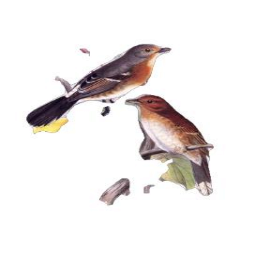

Oops!, The predicted was: Apapane, but the true was: Elepaio


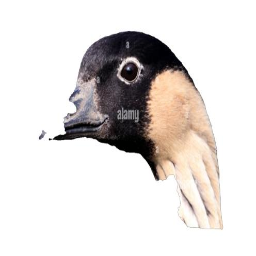

Oops!, The predicted was: Elepaio, but the true was: Hawaiian Goose
2/2 [==============================] - 0s 25ms/step


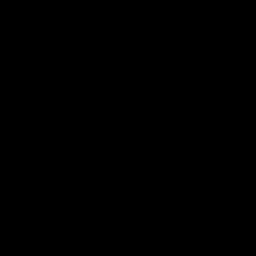

Oops!, The predicted was: Hawaiian coot, but the true was: Elepaio
2/2 [==============================] - 0s 25ms/step


In [281]:
##Evaluation
no_bg_model, no_bg_loss = model_setup(LOAD_PATH= NO_BG_MODEL_SAVE_PATH, current_dataset = no_bg_train_dataset)
no_bg_accuracy, no_bg_confusion_matrix_data = evaluate(no_bg_model, no_bg_test_dataset)


Accuracy: 0.9791666666666666
Confusion Matrix:


([<matplotlib.axis.YTick at 0x7ce79823e950>,
 [Text(0, 0, 'Elepaio'),
  Text(0, 1, 'Hawaiian coot'),
  Text(0, 2, 'Apapane'),
  Text(0, 3, 'Amakihi'),
  Text(0, 4, 'Hawaiian Goose')])

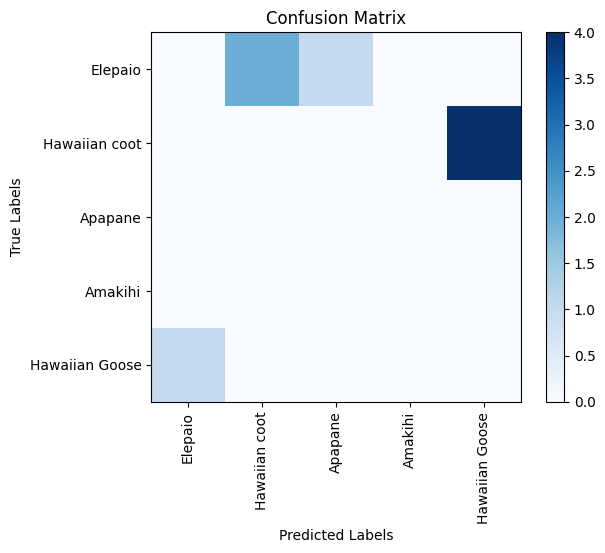

In [282]:
print("Accuracy:", no_bg_accuracy)
print("Confusion Matrix:")
unique_types = no_bg_test_dataset.getUniqueTypes()
num_classes = no_bg_test_dataset.getNumLabels()
tick_locations = range(len(unique_types))

plt.imshow(no_bg_confusion_matrix_data, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(tick_locations, unique_types, rotation='vertical')
plt.yticks(tick_locations, unique_types)

# Enhancements Attempt 2: Data augmentation

In this section, we have tested performing data augmentation through using the ImageDataGenerator of the keras library, and then re-train the model, and we have looked at whether the performance has improved. To do that, we had to specify certain parameters, such as the rotation_range, width_shift_range, height_shift_range, zoom_range, and horizontal flip.

We then use the provided function to generate new images and store them into a new folder with prefix "enhanced".

We create a new Image dataset that contains the Path prefix of the generated images and re-train the model.

Then we evaluate the model.

In [288]:
def load_image(img_path):
    img = Image.open(img_path)
    return img

def save_image(img, save_path):
    img.save(save_path)

In [289]:
NEW_FOLDER_AUGMENTATIOn_PATH = '/content/drive/MyDrive/comp4211/Project/augmented_endemic_images'

In [290]:
for path_and_name in DATASETS_PATHS_AND_NAMES:
  folder_name: path_and_name["folder_name"]
  original_data_dir = path_and_name["path"]

  # Path to the directory where you want to save the augmented images
  augmented_data_dir = f'{NEW_FOLDER_AUGMENTATIOn_PATH}/{folder_name}'

  os.makedirs(augmented_data_dir, exist_ok=True)

  # Create an instance of the ImageDataGenerator with desired augmentation parameters
  datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

  # Iterate over the original images and generate augmented images
  for filename in os.listdir(original_data_dir):
      img_path = os.path.join(original_data_dir, filename)
      img = load_img(img_path)  # Load the image as a PIL image object
      img = img_to_array(img)  # Convert the image to a numpy array
      img = img.reshape((1,) + img.shape)  # Reshape the image

      # Generate augmented images
      i = 0
      for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_data_dir,
                                save_prefix='augmented', save_format='jpg'):
          i += 1
          if i >= 10:  # Stop after generating 10 images
              break

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
ENHANCED_DATASETS_PATHS_AND_NAMES = [
    {"path": '/content/drive/MyDrive/comp4211/Project/endemic_images/hawaiian_goose', "name": 'Hawaiian Goose'},
    {"path": '/content/drive/MyDrive/comp4211/Project/endemic_images/augmented_hawaiian_goose', "name": 'Hawaiian Goose'}, #
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/apapane', "name": 'Apapane'},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/augmented_apapane', "name": 'Apapane'}, #
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/hawaiian_coot', "name": 'Hawaiian coot'},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/augmented_hawaiian_coot', "name": 'Hawaiian coot'}, #
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/amakihi', "name": 'Amakihi'},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/augmented_amakihi', "name": 'Amakihi'}, #
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/elepaio', "name": 'Elepaio'},
    {"path":'/content/drive/MyDrive/comp4211/Project/endemic_images/augmented_elepaio', "name": 'Elepaio'}#
]

In [ ]:
##Create a dataframe with all the image path and image labels
current_augmented_dataframe = createPandaFrameFromImagePaths(ENHANCED_DATASETS_PATHS_AND_NAMES)

In [ ]:
### Split the panda dataframe into train_pd and test_pd
random_state = 4211
augmented_train_df, augmented_test_df = train_test_split(current_augmented_dataframe, test_size=0.2, random_state=random_state)

In [ ]:
augmented_train_dataset, augmented_test_dataset = prepare_datasets(training_df = augmented_train_df, testing_df = augmented_test_df)

In [ ]:
AUGMENTED_MODEL_SAVE_PATH = '/content/drive/MyDrive/comp4211/Project/Model/augmented_classify.h5'

In [ ]:
model_train(model, augmented_train_dataset, loss, n_epochs = 100, save_interval = 10, save_path=AUGMENTED_MODEL_SAVE_PATH)

In [ ]:
NumberEpochMore = 90
model_train(model, augmented_train_dataset, loss, n_epochs = NumberEpochMore, save_interval = 10, save_path=AUGMENTED_MODEL_SAVE_PATH,load_path=AUGMENTED_MODEL_SAVE_PATH)

## Now evaluating whether the data augmentation improved the performance of our model:

In [ ]:
augmented_model, loss = model_setup(LOAD_PATH= AUGMENTED_MODEL_SAVE_PATH)
accuracy, confusion_matrix_data = evaluate(augmented_model, augmented_test_dataset)

In [ ]:
Aprint("Accuracy:", accuracy)
print("Confusion Matrix:")

num_labels = augmented_test_dataset.getNumLabels()
tick_locations = range(len(num_labels))

plt.imshow(confusion_matrix_data, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()

plt.xticks(tick_locations, unique_types, rotation='vertical')
plt.yticks(tick_locations, unique_types)